# Ads Spent Forecasting
Author: Claire Lee Xiao Si

This notebook analyzes ad spending trends and their impact on revenue. It was developed as part of a freelance project for a motorcycle shop, aiming to optimize ad budgets and forecast future spending for maximum profitability.

The data is analyzed in thousands (k), with sales representing the number of units sold. Each unit, priced at RM 5,000, reflects the price of a particular motorcycle model.

### Data Attributes:
1. Segment: Unique ID for each customer group.
2. Google: Ad spend on Google in RM.
3. Facebook: Ad spend on Facebook in RM.
4. Instagram: Ad spend on Instagram in RM.
5. Sales: Total revenue generated (RM).
6. Size: Business scale, either "small" or "large."
7. is_large: Binary indicator (1 = large, 0 = small).
8. Area: Geographic classification (rural, suburban, urban).
9. area_suburban: Binary flag (1 = suburban, 0 = not).
10. area_urban: Binary flag (1 = urban, 0 = not).


## **Business Questions:**
1. What customer segments respond best to advertising efforts?
2. Which platform—Google, Facebook, or Instagram—offers the best ROI for ad spending?


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("social_ads.csv")

In [ ]:
df

,segment,google,facebook,instagram,sales,size,is_large,area,area_suburban,area_urban
0,1,230.1,37.8,69.2,22.1,large,1,rural,0,0
1,2,44.5,39.3,45.1,10.4,small,0,urban,0,1
2,3,17.2,45.9,69.3,9.3,small,0,rural,0,0
3,4,151.5,41.3,58.5,18.5,small,0,urban,0,1
4,5,180.8,10.8,58.4,12.9,large,1,suburban,1,0
...,...,...,...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,small,0,suburban,1,0
196,197,94.2,4.9,8.1,9.7,small,0,urban,0,1
197,198,177.0,9.3,6.4,12.8,small,0,suburban,1,0
198,199,283.6,42.0,66.2,25.5,small,0,rural,0,0


In [ ]:
# For instance, segment 1 revenue
revenue = 22.1 * 1000 * 5000
print(f"RM {revenue:,.2f}")
# revenue

RM 110,500,000.00


In [ ]:
df.describe()

,segment,google,facebook,instagram,sales,is_large,area_suburban,area_urban
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500,0.540000,0.390000,0.315000
std,57.879185,85.854236,14.846809,21.778621,5.217457,0.499648,0.488974,0.465682
min,1.000000,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000,0.000000
25%,50.750000,74.375000,9.975000,12.750000,10.375000,0.000000,0.000000,0.000000
50%,100.500000,149.750000,22.900000,25.750000,12.900000,1.000000,0.000000,0.000000
75%,150.250000,218.825000,36.525000,45.100000,17.400000,1.000000,1.000000,1.000000
max,200.000000,296.400000,49.600000,114.000000,27.000000,1.000000,1.000000,1.000000


# Sales Breakdown by Platform: Google, Facebook, Instagram

<Axes: xlabel='google', ylabel='sales'>

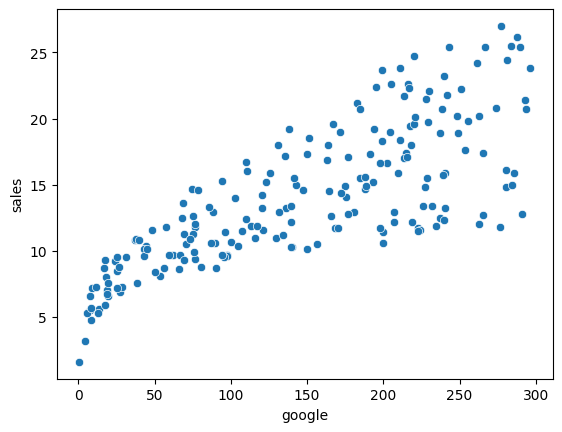

In [ ]:
sns.scatterplot(data=df, x="google", y="sales")

<Axes: xlabel='facebook', ylabel='sales'>

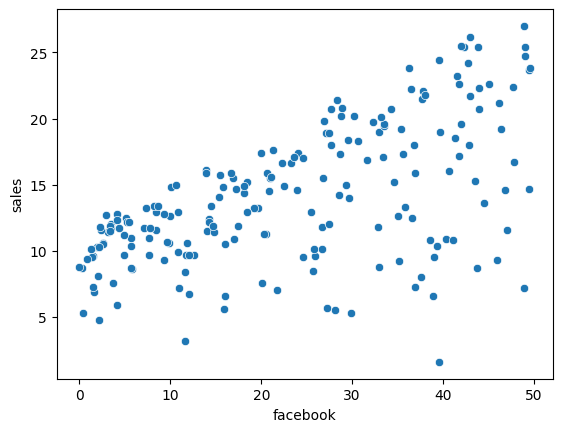

In [ ]:
sns.scatterplot(data=df, x="facebook", y="sales")

<Axes: xlabel='instagram', ylabel='sales'>

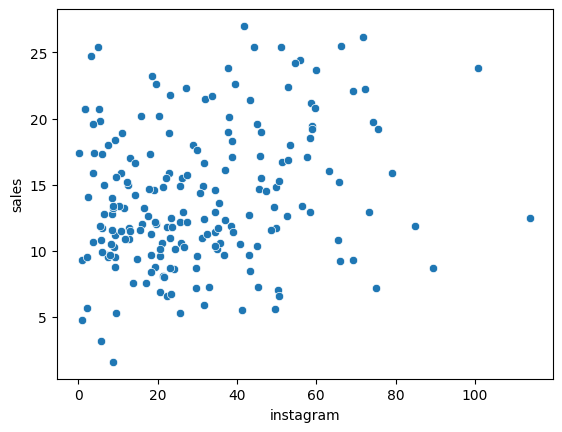

In [ ]:
sns.scatterplot(data=df, x="instagram", y="sales")

<Axes: xlabel='instagram', ylabel='sales'>

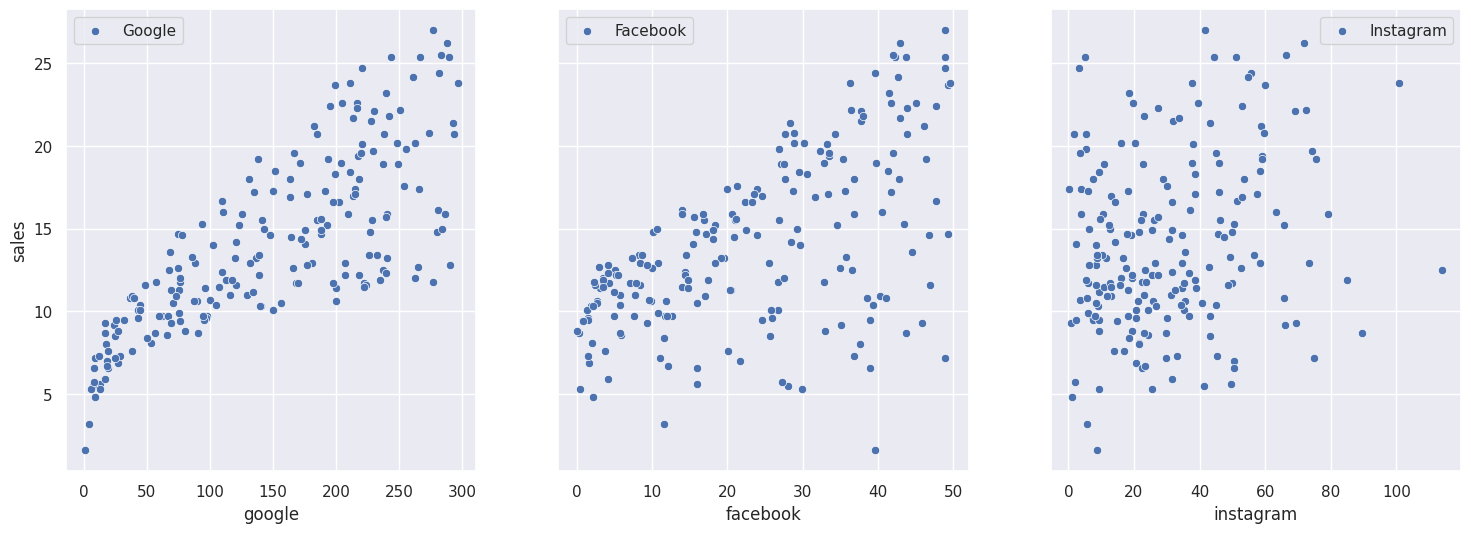

In [ ]:
# Create a side-by-side scatterplot visualization comparing sales against ad spending for three platforms
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18,6)})

fig, axs = plt.subplots(1, 3, sharey=True)

sns.scatterplot(data=df, x="google", y="sales",label="Google", ax=axs[0])
sns.scatterplot(data=df, x="facebook", y="sales", label="Facebook", ax=axs[1])
sns.scatterplot(data=df, x="instagram", y="sales", label="Instagram", ax=axs[2])

Based on the above scatter plots:

**Google Ads:** Strong positive correlation with sales, indicating consistent effectiveness in driving revenue.

**Facebook Ads:** Moderate positive correlation; sales increase gradually with spending.

**Instagram Ads:** Scattered data suggests an inconsistent relationship, making outcomes less predictable.

This highlights Google as the most reliable platform for sales growth.

## **Prediction Models: Ads Spent Forecasting**

Prediction Model: Google Ads

In [ ]:
# Define input and target variables for Google
inputs = ["google"]
target = "sales"

X = df[inputs]
y = df[target]

In [ ]:
# Build and train a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

# Output the slope (coefficient) and y-intercept of the regression line
print(model.coef_)
print(model.intercept_)

[0.04753664]
7.032593549127695


In [ ]:
# Predict sales for a given Google ad budget
budget = 50
# Linear regression formula: y = mx + c
units_sold = 0.04753664 * 50 + 7.032593549127695

In [ ]:
# Calculate expected sales revenue
# Each unit represents 1000 items and is priced at RM 5,000

expected_sales = units_sold * 1000 * 5000
print(f"RM {expected_sales:,.2f}")

RM 47,047,127.75


<Axes: xlabel='instagram', ylabel='sales'>

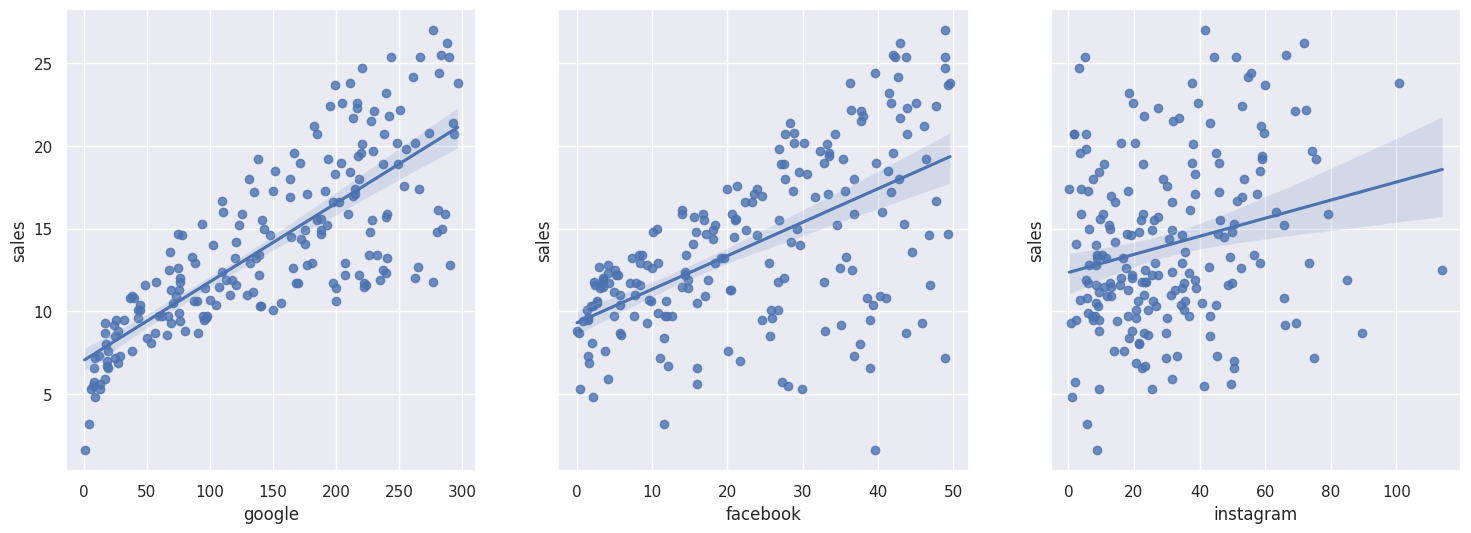

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18,6)})


fig, axs = plt.subplots(1, 3, sharey=True)  # fig: entire figure, axs: individual subplots
# sharey=True ensures all subplots share the same y-axis for comparison

# Plot regression lines with scatterplots for each platform
sns.regplot(data=df, x="google", y="sales", ax=axs[0])  # Google ads vs. sales
sns.regplot(data=df, x="facebook", y="sales", ax=axs[1])  # Facebook ads vs. sales
sns.regplot(data=df, x="instagram", y="sales", ax=axs[2])  # Instagram ads vs. sales


In [ ]:
# Evaluate model performance with R-squared score
score = model.score(X, y)
print("The model score is:", score)


The model score is: 0.611875050850071


Prediction Model: Facebook Ads

In [ ]:
# Define input and target variables for Facebook
inputs = ["facebook"]
target = "sales"

X = df[inputs]
y = df[target]

from sklearn.linear_model import LinearRegression  #
model = LinearRegression()
model.fit(X, y)  # Train the model with Facebook ad spend and sales data

# Output the slope (coefficient) and y-intercept of the regression line
print(model.coef_)
print(model.intercept_)

# Evaluate model performance with R-squared score
score = model.score(X, y)  # R-squared score for Facebook regression
print("The model score for Facebook is:", score)

budget = 50  # this is our x
units_sold = model.coef_[0] * 50 + model.intercept_

# Calculate expected sales revenue
# Each unit represents 1000 items and is priced at RM 5,000
expected_sales = units_sold * 1000 * 5000
print(f"Expected sales from Facebook is RM {expected_sales:,.2f}")

[0.20249578]
9.311638095158283
The model score for Facebook is: 0.33203245544529525
Expected sales from Facebook is RM 97,182,136.32


Prediction Model: Instagram

In [ ]:
# Define input and target variables for Instagram
inputs = ["instagram"]
target = "sales"

X = df[inputs]
y = df[target]

from sklearn.linear_model import LinearRegression  #
model = LinearRegression()
model.fit(X, y)  # Train the model with Facebook ad spend and sales data

# Output the slope (coefficient) and y-intercept of the regression line
print(model.coef_)
print(model.intercept_)

# Evaluate model performance with R-squared score
score = model.score(X,y)  # R-squared score for Facebook regression
print("The model score for Facebook is:", score)

budget = 50  # this is our x
units_sold = model.coef_[0] * 50 + model.intercept_

# Calculate expected sales revenue
# Each unit represents 1000 items and is priced at RM 5,000
expected_sales = units_sold * 1000 * 5000
print(f"Expected sales from Facebook is RM {expected_sales:,.2f}")

[0.0546931]
12.35140706927816
The model score for Facebook is: 0.05212044544430516
Expected sales from Facebook is RM 75,430,309.96


In [ ]:
# Print the coefficient (slope of the regression line)
print(model.coef_)

[0.20249578]


### Ads Spent Forecasting Using Multiple Linear Regression Model
This section builds a multiple linear regression model to predict sales revenue using ad spending and business attributes. By analyzing inputs like Google, Facebook, Instagram, business size, and location, the model evaluates their combined impact on sales and provides insights for optimization.

In [ ]:
# Define input features and target variable
inputs = ["google", "facebook", "instagram", "is_large", "area_urban", "area_suburban"]
target = "sales"

X = df[inputs]
y = df[target]

from sklearn.linear_model import LinearRegression
model.fit(X, y)

# Output the slope (coefficient) and y-intercept of the regression line
print(model.coef_)
print(model.intercept_)

# Evaluate model performance using R-squared score
score = model.score(X, y)
print("The model score is:", score)

[ 0.04574401  0.1878667  -0.0010877   0.07739661  0.26813802 -0.10656299]
2.8741909890879107
The model score is: 0.8981611875394305


The model predicts sales based on multiple factors such as ad spending, business size, and location type. The coefficients indicate how each feature impacts sales, with Facebook and urban areas showing strong positive contributions, while Instagram and suburban areas have minimal or negative effects. The intercept represents the baseline sales when all inputs are zero, and the R-squared score of 0.898 suggests that 89.8% of the variance in sales is explained by the model, demonstrating high accuracy.

In [ ]:
# Predict sales revenue using ad budgets for Google, Facebook, and Instagram
google = 20
fb = 50
ig = 30

# Assume values for is_large, area_urban, area_suburban
is_large = 0  # Example: Assuming the business is not large
area_urban = 1  # Example: Assuming the business is in an urban area
area_suburban = 0  # Example: Assuming the business is not in a suburban area

# Now predict using all 6 features
prediction = model.predict([[google, fb, ig, is_large, area_urban, area_suburban]])
print(prediction)


[13.41791306]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Based on the given inputs, the model predicts approximately 13.42 units sold, equivalent to 13,420 items.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['google', 'facebook', 'instagram']]
y = df['sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)  # Predict sales using testing set features

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error: Measures prediction error
r2 = r2_score(y_test, y_pred)  # R-squared: Proportion of variance explained by the model

mse, r2  # Output performance metrics


(3.1740973539761033, 0.899438024100912)

The output shows Mean Squared Error (MSE) as 3.17, indicating that, on average, the squared difference between actual and predicted sales is small, suggesting accurate predictions. The R-squared (R²) is 0.899, meaning that 89.9% of the variation in sales is explained by the input features, showing the model has strong predictive performance.

### **Conclusion**
Urban customers and large businesses respond best to ads, with Facebook delivering the highest ROI. The model shows high reliability (R² = 0.90), and prioritizing Facebook and Google ads while focusing on urban and large-business demographics is recommended for optimal sales results.